In [1]:
import pandas as pd
df=pd.read_csv('Strokes.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_2
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,233.008420
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,205.245454
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,107.460932
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,173.376126
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,175.038492


**Simple Linear Regression:**
# Simple linear regression is a statistical method used to model the relationship
# between two continuous variables: a dependent variable (or response) and
# an independent variable (or predictor). It assumes a linear relationship
# between the variables, meaning the relationship can be represented by a
# straight line equation: y = a+bx, where 'y' is the dependent variable,
# 'x' is the independent variable, 'b' is the slope (change in y for a unit
# change in x), and 'a' is the y-intercept (the value of y when x is 0)


#Assumptions
## 1. Linearity: There must be a linear relationship between the independent and
##  dependent variables.
## 2. Independence of Errors: The errors (residuals) of the model are independent
##   of each other. This means the residual for one observation is not related
##to the residual for another observation.
## 3. Homoscedasticity: The variance of the errors should be constant across all
##   levels of the independent variable. This means the spread of residuals is
##   roughly the same along the regression line.
## 4. Normality of Errors: The errors should be normally distributed.
## 5. No multicollinearity: If you have multiple independent variables (which is
##    not the case in simple linear regression), they should not be highly
##    correlated with each other. (This assumption is more relevant for multiple
##    linear regression).

In [9]:

# Run simple linear regression of Avg glucose on age
import statsmodels.api as sm
import numpy as np

# Ensure 'age' is numeric. Replace non-numeric values if any.
df['age'] = pd.to_numeric(df['age'], errors='coerce')
# Drop rows with NaN in 'age' or 'avg_glucose_level' after conversion
df.dropna(subset=['age', 'avg_glucose_level'], inplace=True)

# Define dependent variable (y) and independent variable (x)
y = df['avg_glucose_level']
x = df['age']

# Add a constant to the independent variable to include the intercept
x = sm.add_constant(x)

# Create and fit the OLS model
model = sm.OLS(y, x)
results = model.fit()

# Print the regression summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:      avg_glucose_level   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     307.2
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           7.86e-67
Time:                        23:14:18   Log-Likelihood:                -26585.
No. Observations:                5110   AIC:                         5.317e+04
Df Residuals:                    5108   BIC:                         5.319e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.5305      1.328     64.427      0.0

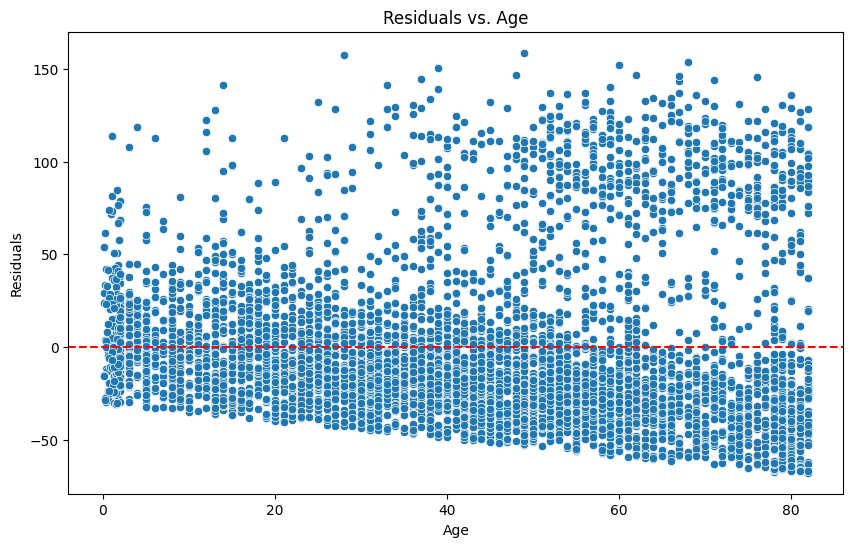

Visual inspection: Check if residuals are randomly scattered around the zero line. A pattern might indicate non-linearity.


In [10]:
# Check assumptions

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import normal_ad

# 1. Linearity check (Visual inspection of residual plot)
# Residuals = Observed - Predicted
residuals = results.resid

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['age'], y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.title('Residuals vs. Age')
plt.show()
print("Visual inspection: Check if residuals are randomly scattered around the zero line. A pattern might indicate non-linearity.")










In [4]:
# 2. Independence of Errors (Not easily checked visually with simple regression, Durbin-Watson in summary is an indicator)
# The Durbin-Watson statistic is in the results.summary() output.
print(f"Durbin-Watson statistic: {results.summary().tables[0].data[2][3]}")
print("Durbin-Watson statistic close to 2 suggests no autocorrelation. Values significantly different from 2 (e.g., < 1.5 or > 2.5) might indicate issues.")

Durbin-Watson statistic:    307.2
Durbin-Watson statistic close to 2 suggests no autocorrelation. Values significantly different from 2 (e.g., < 1.5 or > 2.5) might indicate issues.


In [11]:
# 3. Homoscedasticity (Breusch-Pagan test)
# Null hypothesis: Homoscedasticity is present (residuals have constant variance).
# Alternative hypothesis: Heteroscedasticity is present (residuals do not have constant variance).
bp_test = het_breuschpagan(residuals, x)
bp_pvalue = bp_test[1]
print(f"\nBreusch-Pagan test p-value: {bp_pvalue:.4f}")
alpha = 0.05
if bp_pvalue < alpha:
    print(f"At {alpha} significance level, we reject the null hypothesis. There is evidence of heteroscedasticity.")
else:
    print(f"At {alpha} significance level, we fail to reject the null hypothesis. There is no significant evidence of heteroscedasticity.")

# Visual check for homoscedasticity: Spread of residuals around the zero line should be relatively constant in the Residuals vs. Age plot.


Breusch-Pagan test p-value: 0.0000
At 0.05 significance level, we reject the null hypothesis. There is evidence of heteroscedasticity.


In [12]:
# 4. Normality of Errors (Anderson-Darling test and Q-Q plot)
# Anderson-Darling test
# Null hypothesis: The data comes from a normal distribution.
# Alternative hypothesis: The data does not come from a normal distribution.
ad_test = normal_ad(residuals)
ad_pvalue = ad_test[1]
print(f"\nAnderson-Darling test p-value: {ad_pvalue:.4f}")
if ad_pvalue < alpha:
    print(f"At {alpha} significance level, we reject the null hypothesis. Residuals are not normally distributed.")
else:
    print(f"At {alpha} significance level, we fail to reject the null hypothesis. Residuals are likely normally distributed.")


Anderson-Darling test p-value: 0.0000
At 0.05 significance level, we reject the null hypothesis. Residuals are not normally distributed.


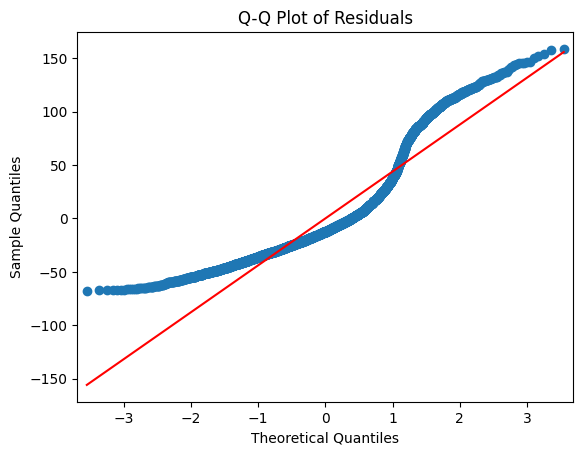

Q-Q plot: Check if points roughly fall along the straight line. Deviations suggest non-normality.


In [13]:
# Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()
print("Q-Q plot: Check if points roughly fall along the straight line. Deviations suggest non-normality.")


In [ ]:

# 5. No multicollinearity (Not applicable for simple linear regression with only one predictor)
print("\nMulticollinearity check is not applicable for simple linear regression.")
